## What is the relationship between children's book texts and YouTube transcripts?  
To examine this: 
* Look at Facebook AI's children's books corpus
* Auto extract transcripts YT videos given a search query
* Get ISBN info from GBooks

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import json 
import numpy as np
import pickle 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read in the books data 
books = pd.read_csv("booksdata.csv")
books.head()

,Title,Author,Text,GutenBook,minAge,maxAge,agecat,agecat2
0,The Cat in The Hat,Dr. Seuss,The sun did not shine. It was too wet to play...,0,3,7,1,0
1,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr,"Brown Bear, Brown Bear, What do you see? I se...",0,2,5,1,0
2,Bear Wants More,Karma Wilson,"When springtime comes, in his warm winter den...",0,3,7,1,0
3,The Duckling gets a cookie!?,Mo Willems,Hello! Scooty scoot scoot! May I have a cooki...,0,2,6,1,0
4,Corduroy,Don Freeman,Corduroy is a bear who once lived in the toy ...,0,2,5,1,0


In [5]:
y1 = books['agecat']
y2 = books['agecat2']
y3 = books['GutenBook']

### Load YT transcripts

In [6]:
ytdata = pd.read_csv('ytdata.csv')
ytdata.shape

(50, 5)

In [7]:
ytdata

,url,title,desc,img,transcript
0,xHpH11hiWfg,RALPH BREAKS THE INTERNET: Wreck-it Ralph 2 Tr...,Ralph's back! Check out our brand trailer for ...,https://i.ytimg.com/vi/xHpH11hiWfg/default.jpg,\nstart turning buttock and put on your start...
1,BJzMhLhc070,Going Batty / Scare B&B | Full Episode | Vampi...,Vampirina and her family move to Pennsylvania ...,https://i.ytimg.com/vi/BJzMhLhc070/default.jpg,\nWalt Disney World is smack dab in the Walt ...
2,rFS65FxmjTI,The BEST Things That Happened To Me in Disney ...,I was in Disney World last week and here are s...,https://i.ytimg.com/vi/rFS65FxmjTI/default.jpg,\nWalt Disney World is smack dab in the Walt ...
3,DFHF_WPI_3Y,Comcast Crushes Disney's Offer With $65 Billio...,Support John on Patreon - http://www.patreon.c...,https://i.ytimg.com/vi/DFHF_WPI_3Y/default.jpg,\nWalt Disney World is smack dab in the Walt ...
4,Ios1RvzXDzs,Walt Disney World Vacation May 2018: Balconysi...,"Reminiscent of our ""J&A Show"" we sat down at t...",https://i.ytimg.com/vi/Ios1RvzXDzs/default.jpg,\nyou guys it's 5:00 a.m. and this is my you ...
5,RTq1awxZp4s,JESSIE | Funniest Clip EVER 😂 | Official Disne...,Check out this hilarious mini clip from the JE...,https://i.ytimg.com/vi/RTq1awxZp4s/default.jpg,\nyou guys it's 5:00 a.m. and this is my you ...
6,EZcg-QYh8Es,TRY NOT TO SING ALONG DISNEY ZOMBIES. (Totally...,We Play Disney's Zombies Try Not To Sing with ...,https://i.ytimg.com/vi/EZcg-QYh8Es/default.jpg,welcome the TPM vids Disney Beat where we\ntal...
7,uWULEN0tyko,Top 7 Hidden Disney Movie References at Magic ...,Top 7 Disney! Walt Disney World's Magic Kingdo...,https://i.ytimg.com/vi/uWULEN0tyko/default.jpg,(THEME MUSIC PLAYING) Personality\nand good lo...
8,jMVwRZGH58I,Dumb Luck | A Mickey Mouse Cartoon | Disney Sh...,Mickey desperately searches for a good luck ch...,https://i.ytimg.com/vi/jMVwRZGH58I/default.jpg,\nso many stories to tell so little time so m...
9,R3HfTaflkr8,Disney Channel Famous Girls Stars Before and A...,"Hey guys! New video,Disney Channel Famous Girl...",https://i.ytimg.com/vi/R3HfTaflkr8/default.jpg,\nso many stories to tell so little time so m...


In [34]:
# Clean YT process:
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.snowball import SnowballStemmer

ws_tokenizer = WhitespaceTokenizer()
snowball = SnowballStemmer('english')

def clean_yt(list_of_docs):
    newlist = []
    for doc in list_of_docs:
        textblock = re.sub("\n",' ',doc.lower())
        textblock_remove_punct = re.sub("[\"\.,:;!?()\']",' ',textblock)
        textblock_remove_music = re.sub("\[[Mm]usic\]",' ',textblock_remove_punct)
        textblock_remove_applause = re.sub("\[[Aa]pplause\]",' ',textblock_remove_music)
        # break into tokens using white space
        ws_tokens = ws_tokenizer.tokenize(textblock_remove_applause)
        # stem the tokens
        token_array=[snowball.stem(word) for word in ws_tokens]
        newlist.append(token_array)
    return newlist

In [35]:
yttext = clean_yt(ytdata['transcript'])      

In [36]:
yttext = [' '.join(line) for line in yttext]

### clean up data

In [37]:
# My stemming process:
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.snowball import SnowballStemmer

ws_tokenizer = WhitespaceTokenizer()
snowball = SnowballStemmer('english')

def clean_block(list_of_docs):
    newlist = []
    for doc in list_of_docs:
        #textblock = re.sub("[^0-9]",' ', doc.lower())
        textblock_remove_punct = re.sub("[\"\.,:;!?()\']",' ',doc.lower())
        # break into tokens using white space
        ws_tokens = ws_tokenizer.tokenize(textblock_remove_punct)
        # stem the tokens
        token_array=[snowball.stem(word) for word in ws_tokens]
        newlist.append(token_array)
    return newlist

In [38]:
doclist_clean = clean_block(doclist)

In [39]:
doclist_clean = [' '.join(line) for line in doclist_clean]

In [46]:
type(doclist_clean),len(doclist_clean)

(list, 197)

In [40]:
# export to csv
doclist_final = pd.DataFrame({'col':doclist_clean})
doclist_final.to_csv("doclist.csv", index=False, encoding='utf8')

In [47]:
doctest = doclist_clean+yttext
print(len(doctest), doctest[0])

247 the sun did not shine it was too wet to play so we sat in the hous all that cold cold wet day i sat there with salli we sat there we two and i said how i wish we had someth to do too wet to go out and too cold to play ball so we sat in the hous we did noth at all so all we could do was to sit sit sit sit and we did not like it not one littl bit and then someth went bump how that bump made us jump we look then we saw him step in on the mat we look and we saw him the cat in the hat and he said to us whi do you sit there like that i know it is wet and the sun is not sunni but we can have lot of good fun that is funni i know some good game we could play said the cat i know some new trick said the cat in the hat a lot of good trick i will show them to you your mother will not mind at all if i do then salli and i did not know what to say our mother was out of the hous for the day but our fish said no no make that cat go away tell that cat in the hat you do not want to play he should not 

In [48]:
## create sql db for flask
testdata['cleantext'] = doccol
testdata.head()

,Unnamed: 0,Title,Author,Text,Age,minAge,maxAge,agecat,cleantext
0,75,The Cat in The Hat,Dr. Seuss,The sun did not shine. It was too wet to play...,0,3,7,1,the sun did not shine it was too wet to play s...
1,30,Don’t Let the Pigeon Drive the Bus,Mo Willems,"I thought he’d never leave. Hey, can I drive...",0,2,6,1,i thought he'd never leav hey can i drive the ...
2,31,The Napping House,Audrey Wood,"There is a house, a napping house, where ever...",0,3,99,1,there is a hous a nap hous where everyon is sl...
3,58,The Berenstain Bears Forget Their Manners,Stan & Jan Berenstain,There was trouble in the big tree house down ...,0,3,7,1,there was troubl in the big tree hous down a s...
4,91,Show Dog,Meghan McCarthy,This is Princess. She is a show dog. Here we ...,0,3,8,1,this is princess she is a show dog here we see...


In [ ]:
doclist2 = doclist_clean + yttext
print(len(doclist2), doclist2[0])

### Feature vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vect = CountVectorizer()
# to use countvectorizer, we need to feed it a flattened list. 

In [32]:
vect.fit(doclist2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [33]:
len(vect.vocabulary_)

27877

In [34]:
vect.get_feature_names()[:400]

['00',
 '000',
 '10',
 '100',
 '105',
 '108',
 '109',
 '10th',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '11th',
 '12',
 '120',
 '124',
 '12th',
 '13',
 '130',
 '133',
 '135',
 '13a',
 '13th',
 '14',
 '140',
 '146',
 '147',
 '15',
 '1500_l',
 '153',
 '157',
 '15th',
 '16',
 '1656',
 '1659',
 '1689',
 '1697',
 '1699',
 '16mo',
 '17',
 '170',
 '1701',
 '1702',
 '171',
 '1715',
 '172',
 '1733',
 '1745',
 '1751',
 '1763',
 '1792',
 '1799',
 '18',
 '180',
 '1838',
 '1839',
 '1840',
 '1841',
 '1855',
 '1861',
 '1864',
 '1865',
 '1867',
 '1869',
 '1870',
 '1871',
 '1872',
 '1876',
 '1881',
 '1883',
 '1885',
 '1886',
 '1889',
 '18th',
 '19',
 '190',
 '1902',
 '1913',
 '1914',
 '1915',
 '1916',
 '1917',
 '1918',
 '1920s',
 '1929',
 '1935',
 '1936',
 '1937',
 '1939',
 '1940',
 '1941',
 '1945',
 '1953',
 '1971',
 '1988',
 '1989',
 '199',
 '1990',
 '1992',
 '1993',
 '1994',
 '1995',
 '1997',
 '1999',
 '19o',
 '19th',
 '1_d',
 '1st',
 '20',
 '2000',
 '2000s',
 '2002',
 '2003',
 '2004',
 '2005

In [71]:
# create a matrix that we can analyze
X = vect.transform(doclist2)
X # this is 247 documents and 27877 words

<247x27877 sparse matrix of type '<class 'numpy.int64'>'
	with 331636 stored elements in Compressed Sparse Row format>

### Pickle the feature vectorization

In [ ]:
import pickle

In [ ]:
# save the model to disk
my_vectorize = 'vectorize_model.sav'
pickle.dump(vect, open(my_vectorize, 'wb'))
 

### use pointwise mutual information

Rather than look at the most common words, let's focus on words with high *positive pointwise mutual information* about each book. This is defined as:

\begin{equation}
PMI(word,doc) = \log \frac{P(w,d)}{P(w)\times P(d)} = \log \frac{P(w|d)}{P(w)} 
\end{equation}

= \log P(i,j) - \log P(i) - \log P(j)

In [72]:
# this computes $p(i)$ the probability of each word
def get_p_word(X):
    X_tot = np.array(X.sum(axis=0))[0]
    return X_tot / X.sum()

In [73]:
P_word = get_p_word(X)
print(X.sum()) # total number of words in the dataset
print(P_word.sum()) # just double checking that this sums to 1

4747734
1.0


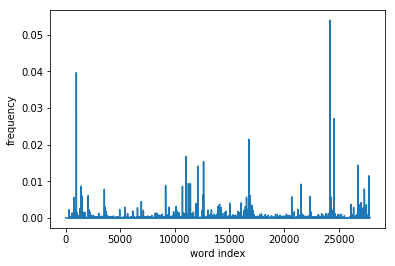

In [74]:
# plot the frequency of each word in the dataset
plt.plot(P_word)
plt.xlabel('word index')
plt.ylabel('frequency');

In [75]:
# this computes $p(j)$ the probability of each book as a list in a column
def get_p_book(X):
    X_tot = np.array(X.sum(axis=1))
    return X_tot / X.sum()

In [76]:
P_book = get_p_book(X)
print(X.sum()) # total number of words in the dataset
print(P_book.sum()) # just double checking that this sums to 1

4747734
1.0


/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


([<matplotlib.axis.XTick at 0x1a420818d0>,
 <a list of 3 Text xticklabel objects>)

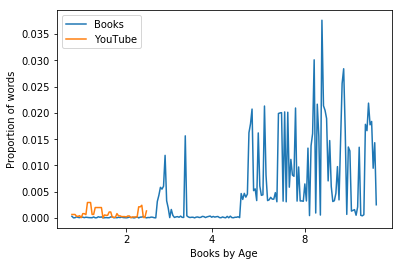

In [257]:
# plot the proportion of words contained in each book
plt.plot(P_book[:197])
plt.plot(P_book[198:])
plt.xlabel('Books by Age')
plt.ylabel('Proportion of words')
plt.legend(['Books','YouTube'])
plt.axes().xaxis.set_tick_params(which='minor',bottom = 'off')
#plt.set_xticks([0, 10, 20, 30], minor=True)
plt.xticks([35,90,150], [testdata['minAge'].iloc[35], 
                         testdata['minAge'].iloc[90],
                        testdata['minAge'].iloc[150]], horizontalalignment='center')

In [78]:
# joint probability of word and book where each row is a book
P_joint = X.toarray()/X.sum()

In [79]:
P_joint

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.31880388e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [80]:
P_word

array([8.84632543e-06, 1.09525934e-05, 2.29583207e-05, ...,
       2.10626796e-07, 2.10626796e-07, 2.10626796e-07])

In [81]:
P_book

array([[3.22680251e-04],
       [2.40114547e-05],
       [4.69697755e-05],
       [2.23896284e-04],
       [1.02364623e-04],
       [6.50836799e-05],
       [1.95251040e-04],
       [1.51861920e-04],
       [5.98180100e-05],
       [1.45964370e-04],
       [1.02996503e-04],
       [6.67686943e-05],
       [4.78122827e-05],
       [4.84441630e-05],
       [1.97778561e-04],
       [2.54858423e-05],
       [4.78122827e-05],
       [2.29793834e-04],
       [1.40277446e-04],
       [1.97357308e-04],
       [3.41215409e-05],
       [4.17041056e-05],
       [7.26662446e-05],
       [4.38103735e-05],
       [4.50741343e-05],
       [2.00937963e-04],
       [2.16945600e-04],
       [3.51746749e-05],
       [7.47725125e-05],
       [4.61272683e-05],
       [1.30167360e-04],
       [8.13019432e-05],
       [1.75662748e-04],
       [7.60362733e-05],
       [6.48730531e-05],
       [3.32790337e-05],
       [7.35087518e-05],
       [1.68922690e-04],
       [9.73095797e-05],
       [8.67782399e-05],


In [82]:
pmi = np.log(P_joint) - np.log(P_word) - np.log(P_book)

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [83]:
#the biggest elements should be last in the argsort
pmi.argsort()[::-1][:5]

array([[    0, 18516, 18515, ..., 24679,  9616, 21029],
       [    0, 18568, 18567, ..., 27231, 15381, 27092],
       [    0, 18568, 18567, ..., 27231, 15381, 27092],
       [    0, 18439, 18438, ...,   221,  4846, 16571],
       [    0, 18486, 18485, ..., 17346, 26708,  8523]])

In [84]:
pmi.shape

(247, 27877)

In [85]:
#I can also look at the words that matter more by
#creating an inverted index from the columns of X back to the vocabulary.
ivoc = {j:i for i,j in vect.vocabulary_.items()}

In [86]:
#what are the most informative words using PMI per book?
all_books = testdata['Title']
for i, book in enumerate(all_books):
    print(book,": ", [ivoc[i] for i in pmi[i].argsort()[::-1][:5]])

 The Cat in The Hat :  ['plop', 'bump', 'kite', 'rake', 'playth']
 Don’t Let the Pigeon Drive the Bus :  ['vroom', 'vroomi', 'mon', 'bus', 'bout']
 The Napping House :  ['snooz', 'cozi', 'flea', 'doze', 'snore']
 The Berenstain Bears Forget Their Manners :  ['fiddlebrain', 'penalty', 'sillyhead', 'noodlepuss', 'marker']
 Show Dog :  ['spittl', 'sheila', 'tzu', 'tacki', 'mutt']
 Olivia :  ['sandcastl', 'edwin', 'perci', 'olivia', 'mommi']
 The Tale of Peter Rabbit :  ['kertyschoo', 'mopsi', 'ritch', 'chamomil', 'scritch']
 The Story of Ferdinand :  ['banderillero', 'picador', 'ferdinand', 'madrid', 'matador']
 Chicka Chicka 1-2-3 :  ['ourtre', 'curvi', 'chicka', '70', 'bumblebe']
 Angelina Ice Skates :  ['ballerina', 'spotlight', 'blizzard', 'angelina', 'mousel']
 Dragons Love Tacos :  ['salsa', 'tortilla', 'peppers', 'chunki', 'samaritan']
 Little Blue Truck Leads the Way :  ['shorti', 'zooom', 'limo', 'wooeeee', 'beeper']
 Maisy Goes to the Library :  ['maisi', 'tallulah', 'cyril', 'a

The Cricket on the Hearth :  ['bridecak', 'tackleton', 'resistless', 'safety', 'incontrovert']
The Adventures of Jimmy Skunk :  ['aigg', 'rolli', 'prepared', 'ohoo', 'meadowlark']
The Second Jungle Book :  ['whoof', 'tornait', 'flathead', 'cable', 'byr']
The Toll Gatherer's Day (From "Twice Told Tales") :  ['showbil', 'haymow', 'infold', 'harouch', 'insolv']
Treasure Island :  ['assiz', 'umber', 'benbow', '__', 'warier']
Kidnapped :  ['disrelish', 'cutti', 'daunton', 'rowing', 'rowpit']
Twice Told Tales :  ['clonk', 'dissev', 'monomania', 'arethusa', 'misspelt']
The Village Uncle (From "Twice Told Tales") :  ['loomi', 'farup', 'grocery', 'deepwat', 'tarpaul']
Kim :  ['desertest', 'rott', 'ritual', 'rissaldar', 'rishti']
Anne Of The Island :  ['crimean', 'plebian', 'heep', 'freshett', 'heftier']
The Sister Years (From "Twice Told Tales") :  ['timeworn', 'retrench', 'lauriat', 'foco', 'vacillatori']
Little Women :  ['dropisc', 'vicar', 'joli', 'schooltim', 'stefan']
Little Men :  ['turee

### 1. normalize the feature vectors

In [259]:
from sklearn.preprocessing import normalize

In [260]:
norm_X = normalize(X, norm='l2', axis=1)
# mean centered with unit variance

/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


([<matplotlib.axis.XTick at 0x1a1f356358>,
 <a list of 3 Text xticklabel objects>)

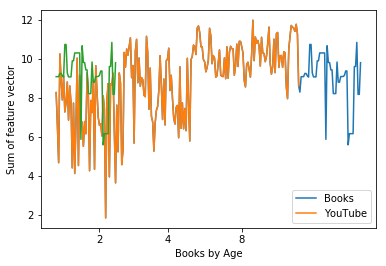

In [334]:
plt.plot(norm_X.sum(axis=1))
plt.plot(norm_X[:197].sum(axis=1))
plt.plot(norm_X[198:].sum(axis=1))
plt.xlabel('Books by Age')
plt.ylabel('Sum of feature vector')
plt.legend(['Books','YouTube'])
plt.axes().xaxis.set_tick_params(which='minor',bottom = 'off')
plt.xticks([35,90,150], [testdata['minAge'].iloc[35], testdata['minAge'].iloc[90],
                         testdata['minAge'].iloc[150]], horizontalalignment='center')

### 2. obtain positive PMI

In [273]:
def get_PMI(X):
    P_word = get_p_word(X)
    P_book = get_p_book(X)
    P_joint = X.toarray()/X.sum()
    return np.log(P_joint) - np.log(P_word) - np.log(P_book)

In [274]:
pmi = get_PMI(norm_X)

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


### positive PMI

In [275]:
from numpy import inf

In [276]:
pmi[np.isnan(pmi)]=0 # NAs to 0

In [277]:
pmi[pmi<0]=0 # neg to 0

In [278]:
pmi[pmi == -inf]=0 # neg inf to 0

/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


([<matplotlib.axis.XTick at 0x1a2024ec50>,
 <a list of 3 Text xticklabel objects>)

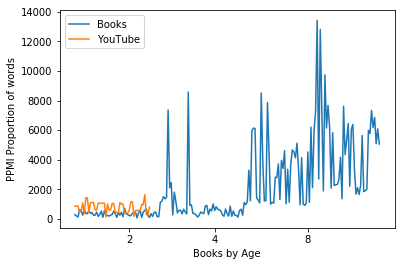

In [280]:
plt.plot(pmi[:197].sum(axis=1))
plt.plot(pmi[198:].sum(axis=1))
plt.xlabel('Books by Age')
plt.ylabel('PPMI Proportion of words')
plt.legend(['Books','YouTube'])
plt.axes().xaxis.set_tick_params(which='minor',bottom = 'off')
plt.xticks([35,90,150], [testdata['minAge'].iloc[35], testdata['minAge'].iloc[90],
                         testdata['minAge'].iloc[150]], horizontalalignment='center')

### Singular value decomposition

In [281]:
#http://blog.applied.ai/visualising-high-dimensional-data/
from sklearn.decomposition import TruncatedSVD

In [291]:
ncomps = 100
svd = TruncatedSVD(n_components=ncomps, n_iter=5)

In [295]:
svd_fit = svd.fit(pmi)

In [296]:
#how much variance is explained?
print(svd.explained_variance_ratio_.sum())

0.8854798276012494


Variance preserved by first 50 components == 88.56%


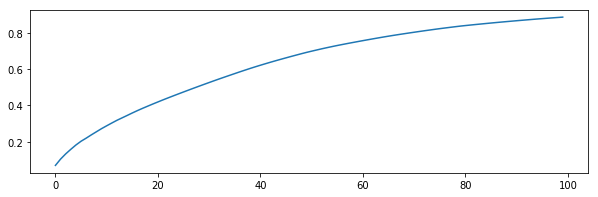

In [297]:
Y = svd.fit_transform(pmi) 
ax = pd.Series(svd_fit.explained_variance_ratio_.cumsum()).plot(kind='line', figsize=(10,3))
print('Variance preserved by first 50 components == {:.2%}'.format(
        svd_fit.explained_variance_ratio_.cumsum()[-1]))

In [310]:
ncomps = 100
dfsvd = pd.DataFrame(Y, columns=['c{}'.format(c) for c in range(ncomps)])
print(dfsvd.shape)
dfsvd.head()

(247, 100)


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,1.117368,-0.084069,0.599004,-0.897195,-0.777698,-0.002069,-1.798100,-0.375260,-0.521099,-0.131348,...,-1.046439,0.221368,-0.438092,-0.166803,-0.581543,-0.049429,-0.408685,0.805074,-0.958185,-0.713084
1,0.415109,-0.063367,0.142658,-0.280221,-0.322821,0.021652,-0.953574,-0.273814,-0.240060,-0.041012,...,-0.518116,0.748296,0.392549,-0.172941,-0.434683,-0.790006,0.185671,0.433574,0.029120,0.137434
2,0.221858,-0.007732,0.145425,-0.109039,-0.196224,0.033705,-0.599341,-0.192575,-0.154364,-0.069163,...,-0.541246,-0.063926,0.013248,-0.151333,-0.192375,0.197679,0.217931,0.366313,-0.636480,-0.208589
3,2.186965,-0.168488,0.700839,-1.113209,-1.222209,0.027399,-3.110526,-0.966610,-0.971565,-0.172952,...,-1.820941,-0.758245,-2.010931,0.667226,-0.243934,-1.609535,-3.675550,3.559593,-1.592180,2.072109
4,1.533986,-0.101524,0.858316,-0.939244,-0.891504,0.081551,-2.694867,-0.857937,-0.809002,-0.248871,...,-3.334314,2.311009,1.447314,2.516638,-0.428915,3.731598,1.658980,-1.208890,-0.857956,-1.754648


In [ ]:
# to fit new video vector to this one: svd.transform(videos)


/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


([<matplotlib.axis.XTick at 0x1a42097a90>,
 <a list of 3 Text xticklabel objects>)

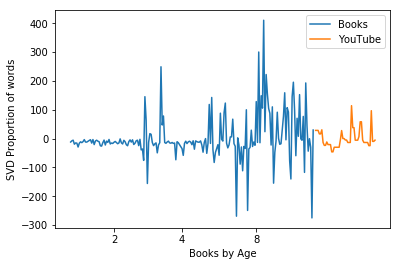

In [312]:
plt.plot(dfsvd[:197].sum(axis=1))
plt.plot(dfsvd[198:].sum(axis=1))
plt.xlabel('Books by Age')
plt.ylabel('SVD Proportion of words')
plt.legend(['Books','YouTube'])
plt.axes().xaxis.set_tick_params(which='minor',bottom = 'off')
plt.xticks([35,90,150], [testdata['minAge'].iloc[35], testdata['minAge'].iloc[90],
                         testdata['minAge'].iloc[150]], horizontalalignment='center')

## Classify X

In [313]:
finaldata = X
# true test set
newdata = finaldata[197:]
modeldata = finaldata[:197]

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(modeldata, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [315]:
lr.fit(X_train,y_train) 
#This output shows some parameters useful to tune the behavior of the classifier.
# top 10 features for each label 
for label in lr.classes_: 
    print([vect.get_feature_names()[i] for i in lr.coef_[label-1].argsort()[::-1][:10]])

['sent', 'david', 'olivia', 'bus', 'snow', 'goodnight', 'toy', 'llama', 'night', 'out']
['doe', 'up', 'when', 'babi', 'realli', 'to', 'georg', 'duck', 'care', 'harri']
['had', 'of', 'as', 'did', 'that', 'man', 'which', 'him', 'queen', 'rrb']


In [316]:
y_hat = lr.predict(X_test)
y_hat

array([2, 2, 1, 3, 3, 2, 2, 3, 2, 1, 2, 1, 2, 3, 3, 3, 1, 1, 3, 1])

In [317]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test,y_hat),
      f1_score(y_test,y_hat,average='macro'), #f1 score is geometric mean of recall & precision
      f1_score(y_test,y_hat,average='micro')) #Macro-averaging means average across labels.
#scores are different because the samples across labels is unbalanced.
#On an instance level, if I care about being right then I want to look at micro.
#Macro looks at the f1 for all my labels, and averages them all together. Do this when 
#you care about the rare cases, even if the label only appears a small 
#fraction of the time, we want to get it right. 

0.75 0.7392191142191141 0.75


In [318]:
# metrics for each label: we probably want to err on the side of minimizing false negatives
yh=np.array(y_hat)
yt=np.array(y_test)

for label in lr.classes_:
    label_tp=sum((yt==label) & (yh==label))
    label_fp=sum((yt!=label) & (yh==label))
    label_fn=sum((yt==label) & (yh!=label))
    if label_tp+label_fp!=0:
        label_prec = label_tp/(label_tp+label_fp) 
    else:
        label_prec=0
    if sum(yt==label)!=0:
        label_rec = label_tp/sum(yt==label)
    else:
        label_rec=0
    if label_prec + label_rec !=0:
        f1=2 * label_prec * label_rec / (label_prec + label_rec)
    else:
        f1=0
    print(label,': ', 'TPos %s'%(label_tp), 'FPos %s'%(label_fp),'FNeg %s'%(label_fn), 'Prec %s'%(label_prec),'Recall %.1f'%(label_rec),'F1 %s'%(f1))       

1 :  TPos 4 FPos 2 FNeg 1 Prec 0.6666666666666666 Recall 0.8 F1 0.7272727272727272
2 :  TPos 4 FPos 3 FNeg 2 Prec 0.5714285714285714 Recall 0.7 F1 0.6153846153846153
3 :  TPos 7 FPos 0 FNeg 2 Prec 1.0 Recall 0.8 F1 0.8750000000000001


In [319]:
yt_hat = lr.predict(newdata)
ytdata['predAge']=yt_hat
sortedyt = ytdata.sort_values(by='predAge', ascending=True)
sortedyt

,url,title,desc,img,transcript,predAge
48,n4ehX5s38oY,WRECK-IT RALPH 2 'Disney Princesses ft. Frozen...,Watch the official 'Disney Princesses' clip fo...,https://i.ytimg.com/vi/n4ehX5s38oY/default.jpg,\n[Music] \n \n[Music] \n \nI'm a princ...,1
47,sDAnsc9kAEo,is old disney actually better than new disney?,my youtube recommended section is all disney n...,https://i.ytimg.com/vi/sDAnsc9kAEo/default.jpg,\n[Music] \n \n[Music] \n \nI'm a princ...,1
4,Ios1RvzXDzs,Walt Disney World Vacation May 2018: Balconysi...,"Reminiscent of our ""J&A Show"" we sat down at t...",https://i.ytimg.com/vi/Ios1RvzXDzs/default.jpg,\nyou guys it's 5:00 a.m. and this is my you ...,1
5,RTq1awxZp4s,JESSIE | Funniest Clip EVER 😂 | Official Disne...,Check out this hilarious mini clip from the JE...,https://i.ytimg.com/vi/RTq1awxZp4s/default.jpg,\nyou guys it's 5:00 a.m. and this is my you ...,1
33,dMIfBNdmNdk,Sofia The First Kids Makeup Disney Princess Pr...,Please Subscribe For More Videos! ___ MORE VID...,https://i.ytimg.com/vi/dMIfBNdmNdk/default.jpg,\nhi this is Josh with resort tv1 and hi this...,1
7,uWULEN0tyko,Top 7 Hidden Disney Movie References at Magic ...,Top 7 Disney! Walt Disney World's Magic Kingdo...,https://i.ytimg.com/vi/uWULEN0tyko/default.jpg,(THEME MUSIC PLAYING) Personality\nand good lo...,1
34,qut17mfUKfo,🔴 LIVE: A rainy evening at Disney’s Animal Ki...,SUPERCHAT & RECEIVE A FAMILY SHOUTOUT || (BOTT...,https://i.ytimg.com/vi/qut17mfUKfo/default.jpg,\nhi this is Josh with resort tv1 and hi this...,1
35,P20qsvv_oqo,INCREDIBLES SUPER CHARGED EVENT ! - Disney Her...,TWEET ME GAMES ! : https://twitter.com/hokagef...,https://i.ytimg.com/vi/P20qsvv_oqo/default.jpg,\nhi this is Josh with resort tv1 and hi this...,1
10,U5Js--h6srM,Squirrel Steals Bag of Peanut M&Ms From Store ...,A squirrel stole a bag of Peanut M&Ms from a s...,https://i.ytimg.com/vi/U5Js--h6srM/default.jpg,\nhey guys it's me hey that can't no I'm hey ...,1
15,jD6i6PeM4fs,WALT DISNEY WORLD VLOGS 2018 PART 1,️Here is the first part of our amazing Walt Di...,https://i.ytimg.com/vi/jD6i6PeM4fs/default.jpg,\nmy wife and Lisa mother no \n \nnew call...,1


## Classify Normalized

In [320]:
finaldata = norm_X
# true test set
newdata = finaldata[197:]
modeldata = finaldata[:197]

In [321]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(modeldata, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [322]:
lr.fit(X_train,y_train) 
#This output shows some parameters useful to tune the behavior of the classifier.
# top 10 features for each label 
for label in lr.classes_: 
    print([vect.get_feature_names()[i] for i in lr.coef_[label-1].argsort()[::-1][:10]])

['olivia', 'llama', 'bus', 'dog', 'you', 'goodnight', 'tree', 'train', 'bear', 'snow']
['he', 'georg', 'up', 'll', 'my', 'when', 'said', 'realli', 'babi', 'mr']
['of', 'the', 'to', 'had', 'that', 'as', 'and', 'it', 'in', 'was']


In [323]:
y_hat = lr.predict(X_test)
y_hat

array([2, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2])

In [324]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test,y_hat),
      f1_score(y_test,y_hat,average='macro'), #f1 score is geometric mean of recall & precision
      f1_score(y_test,y_hat,average='micro')) #Macro-averaging means average across labels.
#scores are different because the samples across labels is unbalanced.
#On an instance level, if I care about being right then I want to look at micro.
#Macro looks at the f1 for all my labels, and averages them all together. Do this when 
#you care about the rare cases, even if the label only appears a small 
#fraction of the time, we want to get it right. 

0.55 0.4193121693121693 0.55


In [325]:
# metrics for each label: we probably want to err on the side of minimizing false negatives
yh=np.array(y_hat)
yt=np.array(y_test)

for label in lr.classes_:
    label_tp=sum((yt==label) & (yh==label))
    label_fp=sum((yt!=label) & (yh==label))
    label_fn=sum((yt==label) & (yh!=label))
    if label_tp+label_fp!=0:
        label_prec = label_tp/(label_tp+label_fp) 
    else:
        label_prec=0
    if sum(yt==label)!=0:
        label_rec = label_tp/sum(yt==label)
    else:
        label_rec=0
    if label_prec + label_rec !=0:
        f1=2 * label_prec * label_rec / (label_prec + label_rec)
    else:
        f1=0
    print(label,': ', 'TPos %s'%(label_tp), 'FPos %s'%(label_fp),'FNeg %s'%(label_fn), 'Prec %s'%(label_prec),'Recall %.1f'%(label_rec),'F1 %s'%(f1))       

1 :  TPos 1 FPos 1 FNeg 4 Prec 0.5 Recall 0.2 F1 0.28571428571428575
2 :  TPos 1 FPos 2 FNeg 5 Prec 0.3333333333333333 Recall 0.2 F1 0.2222222222222222
3 :  TPos 9 FPos 6 FNeg 0 Prec 0.6 Recall 1.0 F1 0.7499999999999999


In [326]:
yt_hat = lr.predict(newdata)
ytdata['predAge']=yt_hat
sortedyt = ytdata.sort_values(by='predAge', ascending=True)
sortedyt

,url,title,desc,img,transcript,predAge
0,xHpH11hiWfg,RALPH BREAKS THE INTERNET: Wreck-it Ralph 2 Tr...,Ralph's back! Check out our brand trailer for ...,https://i.ytimg.com/vi/xHpH11hiWfg/default.jpg,\nstart turning buttock and put on your start...,1
48,n4ehX5s38oY,WRECK-IT RALPH 2 'Disney Princesses ft. Frozen...,Watch the official 'Disney Princesses' clip fo...,https://i.ytimg.com/vi/n4ehX5s38oY/default.jpg,\n[Music] \n \n[Music] \n \nI'm a princ...,1
33,dMIfBNdmNdk,Sofia The First Kids Makeup Disney Princess Pr...,Please Subscribe For More Videos! ___ MORE VID...,https://i.ytimg.com/vi/dMIfBNdmNdk/default.jpg,\nhi this is Josh with resort tv1 and hi this...,1
21,LwvVogVy-vs,De Middelste van 7 | Technologie-loos | Disney...,Suzy pakt alle technologie van haar kinderen a...,https://i.ytimg.com/vi/LwvVogVy-vs/default.jpg,\nthis is an ad for Google hey Google Play th...,1
34,qut17mfUKfo,🔴 LIVE: A rainy evening at Disney’s Animal Ki...,SUPERCHAT & RECEIVE A FAMILY SHOUTOUT || (BOTT...,https://i.ytimg.com/vi/qut17mfUKfo/default.jpg,\nhi this is Josh with resort tv1 and hi this...,1
35,P20qsvv_oqo,INCREDIBLES SUPER CHARGED EVENT ! - Disney Her...,TWEET ME GAMES ! : https://twitter.com/hokagef...,https://i.ytimg.com/vi/P20qsvv_oqo/default.jpg,\nhi this is Josh with resort tv1 and hi this...,1
15,jD6i6PeM4fs,WALT DISNEY WORLD VLOGS 2018 PART 1,️Here is the first part of our amazing Walt Di...,https://i.ytimg.com/vi/jD6i6PeM4fs/default.jpg,\nmy wife and Lisa mother no \n \nnew call...,1
14,C3U1fUSyeRs,Comcast Outbids Disney with 65 Billion for FOX...,After the ruling last night between AT&T and T...,https://i.ytimg.com/vi/C3U1fUSyeRs/default.jpg,\nmy wife and Lisa mother no \n \nnew call...,1
40,owmmHne1smA,"Perfect Day 2.0 | Mack Chat: S2, Episode 16 | ...",Mack Chat is back! Join the fans of Andi Mack ...,https://i.ytimg.com/vi/owmmHne1smA/default.jpg,"(THEME MUSIC PLAYING) (WHISTLING) Hey, it's Mi...",1
41,-NkP9qH5YD4,Tinkerbell was Having a Ball! - Disney World I...,More Disney World Impressions! This time meeti...,https://i.ytimg.com/vi/-NkP9qH5YD4/default.jpg,"(THEME MUSIC PLAYING) (WHISTLING) Hey, it's Mi...",1


### Classify PMI, SVD

In [327]:
finaldata = dfsvd
# true test set
newdata = finaldata[197:]
modeldata = finaldata[:197]

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(modeldata, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [329]:
lr.fit(X_train,y_train) 
#This output shows some parameters useful to tune the behavior of the classifier.
# top 10 features for each label 
for label in lr.classes_: 
    print([vect.get_feature_names()[i] for i in lr.coef_[label-1].argsort()[::-1][:10]])

['1917', '1915', '18th', '1971', '1864', '11th', '1799', '1937', '15th', '1763']
['1792', '1889', '1840', '1936', '1918', '1871', '1885', '112', '17', '1838']
['1937', '18th', '1936', '1989', '13th', '1945', '1876', '1953', '1867', '1939']


In [330]:
y_hat = lr.predict(X_test)
y_hat

array([1, 2, 1, 3, 3, 2, 2, 3, 3, 1, 2, 1, 3, 2, 2, 3, 2, 2, 3, 1])

In [331]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test,y_hat),
      f1_score(y_test,y_hat,average='macro'), #f1 score is geometric mean of recall & precision
      f1_score(y_test,y_hat,average='micro')) #Macro-averaging means average across labels.
#scores are different because the samples across labels is unbalanced.
#On an instance level, if I care about being right then I want to look at micro.
#Macro looks at the f1 for all my labels, and averages them all together. Do this when 
#you care about the rare cases, even if the label only appears a small 
#fraction of the time, we want to get it right. 

0.7 0.7071428571428573 0.7


In [332]:
# metrics for each label: we probably want to err on the side of minimizing false negatives
yh=np.array(y_hat)
yt=np.array(y_test)

for label in lr.classes_:
    label_tp=sum((yt==label) & (yh==label))
    label_fp=sum((yt!=label) & (yh==label))
    label_fn=sum((yt==label) & (yh!=label))
    if label_tp+label_fp!=0:
        label_prec = label_tp/(label_tp+label_fp) 
    else:
        label_prec=0
    if sum(yt==label)!=0:
        label_rec = label_tp/sum(yt==label)
    else:
        label_rec=0
    if label_prec + label_rec !=0:
        f1=2 * label_prec * label_rec / (label_prec + label_rec)
    else:
        f1=0
    print(label,': ', 'TPos %s'%(label_tp), 'FPos %s'%(label_fp),'FNeg %s'%(label_fn), 'Prec %s'%(label_prec),'Recall %.1f'%(label_rec),'F1 %s'%(f1))       

1 :  TPos 4 FPos 1 FNeg 1 Prec 0.8 Recall 0.8 F1 0.8000000000000002
2 :  TPos 4 FPos 4 FNeg 2 Prec 0.5 Recall 0.7 F1 0.5714285714285715
3 :  TPos 6 FPos 1 FNeg 3 Prec 0.8571428571428571 Recall 0.7 F1 0.75


In [333]:
yt_hat = lr.predict(newdata)
ytdata['predAge']=yt_hat
sortedyt = ytdata.sort_values(by='predAge', ascending=True)
sortedyt

,url,title,desc,img,transcript,predAge
0,xHpH11hiWfg,RALPH BREAKS THE INTERNET: Wreck-it Ralph 2 Tr...,Ralph's back! Check out our brand trailer for ...,https://i.ytimg.com/vi/xHpH11hiWfg/default.jpg,\nstart turning buttock and put on your start...,1
48,n4ehX5s38oY,WRECK-IT RALPH 2 'Disney Princesses ft. Frozen...,Watch the official 'Disney Princesses' clip fo...,https://i.ytimg.com/vi/n4ehX5s38oY/default.jpg,\n[Music] \n \n[Music] \n \nI'm a princ...,1
25,K30HNOkhclg,🐸 Disney in Color 🐸 #8 BEST EVER DISNEY DREAM ...,Tiana and Prince Naveen went on a DREAM DATE! ...,https://i.ytimg.com/vi/K30HNOkhclg/default.jpg,\nall who come to this happy place welcome \...,1
26,9MlWA5V93-k,10 Iconic Treats You Shouldn't Skip At Disney ...,From Mickey-shaped pretzels to chocolate-cover...,https://i.ytimg.com/vi/9MlWA5V93-k/default.jpg,\nall who come to this happy place welcome \...,1
27,GEamAGuopcw,Disney's DUMBO Movie Trailer (2018),Official DUMBO Movie Trailer - The beloved tal...,https://i.ytimg.com/vi/GEamAGuopcw/default.jpg,[Music] at two o'clock in the morning as if...,1
28,rsriJaE-VSg,DISNEY - ORIGINAL SINGING VOICE ACTORS ..!! 20...,DISNEY - ORIGINAL SINGING VOICE ACTORS ..!! PA...,https://i.ytimg.com/vi/rsriJaE-VSg/default.jpg,[Music] at two o'clock in the morning as if...,1
29,yJLmek6euTA,Walt Disney World & Florida Vlog - May 2018 - ...,Walt Disney World & Florida Vlog - May 2018 - ...,https://i.ytimg.com/vi/yJLmek6euTA/default.jpg,[Music] at two o'clock in the morning as if...,1
30,p4D19K8s-lA,10 Theories That Make Disney Movies So Much Da...,"Beware, some of these fan theories just might ...",https://i.ytimg.com/vi/p4D19K8s-lA/default.jpg,\ndespite being filled with happy moments des...,1
31,0U1PTUZPZOo,Adventureland - Magic Kingdom | Relaxing Strol...,Join me for a relaxing stroll at night in Adve...,https://i.ytimg.com/vi/0U1PTUZPZOo/default.jpg,hi guys okay this jéssica concussion that i...,1
23,NqkRdAFRnEs,DISNEY - ORIGINAL SINGING VOICE ACTORS..!! 2018,DISNEY - ORIGINAL SINGING VOICE ACTORS 2018. S...,https://i.ytimg.com/vi/NqkRdAFRnEs/default.jpg,\ngood morning everyone its Ryan here from go...,1


### Pickle a model

In [30]:
from sklearn import model_selection
# your model type
from sklearn.linear_model import LogisticRegression
import pickle

In [31]:
# train your model
lr.fit(X_train,y_train) 

NameError: name 'lr' is not defined

### Let's start by making a training and test set out of the books

In [168]:
finaldata = X

In [169]:
# true test set
newdata = finaldata[197:]
newdata.shape

(50, 27877)

In [170]:
# train and validation set
modeldata = finaldata[:197]
modeldata.shape

(197, 27877)

In [171]:
len(y)

197

In [172]:
#call the function to hold out a test set
from sklearn.model_selection import train_test_split

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(modeldata, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)

### train the classifier

In [174]:
# starting with a simple logistic regression 
from sklearn.linear_model import LogisticRegression

In [175]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [176]:
lr.fit(X_train,y_train) #This output shows some parameters useful to tune the behavior of the classifier.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [177]:
# double check the DV
lr.classes_

array([1, 2, 3, 4])

In [178]:
lr.coef_

array([[ 3.37904762e-03, -9.97949043e-04,  2.97440442e-02, ...,
        -2.85565153e-04, -9.82284571e-10, -7.46369699e-10],
       [-2.90414397e-03,  9.02766533e-04, -2.67409658e-02, ...,
         5.37219212e-04, -1.19185108e-07,  1.00747621e-06],
       [ 6.29806086e-04, -4.47459035e-06, -1.27515988e-02, ...,
        -6.02735986e-05, -1.63868020e-06,  2.87311191e-05],
       [-8.74377550e-04, -5.22869187e-04, -7.13093208e-03, ...,
        -7.70850394e-05,  7.72501826e-06,  5.35209402e-06]])

### look at top keywords per class

In [179]:
# top 10 features for each label 
for label in lr.classes_: 
    print([vect.get_feature_names()[i] for i in lr.coef_[label-1].argsort()[::-1][:10]])

['david', 'sent', 'olivia', 'bus', 'snow', 'goodnight', 'night', 'toy', 'llama', 'mom']
['doe', 'up', 'when', 'babi', 'realli', 'to', 'georg', 'duck', 'care', 'harri']
['as', 'did', 'ann', 'had', 'man', 'that', 'him', 'all', 'wendi', 'if']
['had', 'of', 'as', 'lsb', 'rsb', 'alic', 'tom', 'him', 'queen', 'did']


### plot feature weights for different classes

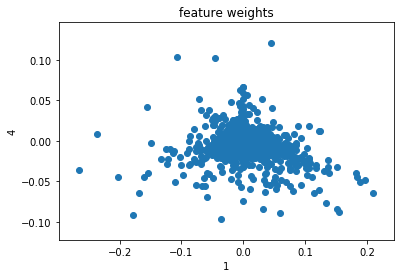

In [150]:
plt.scatter(lr.coef_[0],lr.coef_[3])
plt.xlabel(lr.classes_[0])
plt.ylabel(lr.classes_[3])
plt.title('feature weights');

### predictive accuracy for books

In [151]:
y_hat = lr.predict(X_test)
y_hat

array([2, 3, 1, 4, 4, 2, 2, 4, 2, 1, 2, 1, 3, 2, 3, 4, 3, 1, 2, 1])

In [152]:
# what percentage is classified correctly? 
acc = (y_hat == y_test).mean()
print('accuracy: %.3f'%acc)

accuracy: 0.700


In [153]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test,y_hat),
      f1_score(y_test,y_hat,average='macro'), #f1 score is geometric mean of recall & precision
      f1_score(y_test,y_hat,average='micro')) #Macro-averaging means average across labels.
#scores are different because the samples across labels is unbalanced.
#On an instance level, if I care about being right then I want to look at micro.
#Macro looks at the f1 for all my labels, and averages them all together. Do this when 
#you care about the rare cases, even if the label only appears a small 
#fraction of the time, we want to get it right. 

0.7 0.7010683760683761 0.7


In [154]:
yh=np.array(y_hat)
yt=np.array(y_test)
yh, yt

(array([2, 3, 1, 4, 4, 2, 2, 4, 2, 1, 2, 1, 3, 2, 3, 4, 3, 1, 2, 1]),
 array([1, 4, 2, 4, 4, 2, 2, 4, 2, 1, 2, 1, 3, 3, 3, 4, 2, 1, 3, 1]))

In [155]:
# metrics for each label: we probably want to err on the side of minimizing false negatives
yh=np.array(y_hat)
yt=np.array(y_test)

for label in lr.classes_:
    label_tp=sum((yt==label) & (yh==label))
    label_fp=sum((yt!=label) & (yh==label))
    label_fn=sum((yt==label) & (yh!=label))
    if label_tp+label_fp!=0:
        label_prec = label_tp/(label_tp+label_fp) 
    else:
        label_prec=0
    if sum(yt==label)!=0:
        label_rec = label_tp/sum(yt==label)
    else:
        label_rec=0
    if label_prec + label_rec !=0:
        f1=2 * label_prec * label_rec / (label_prec + label_rec)
    else:
        f1=0
    print(label,': ', 'TPos %s'%(label_tp), 'FPos %s'%(label_fp),'FNeg %s'%(label_fn), 'Prec %s'%(label_prec),'Recall %.1f'%(label_rec),'F1 %s'%(f1))       

1 :  TPos 4 FPos 1 FNeg 1 Prec 0.8 Recall 0.8 F1 0.8000000000000002
2 :  TPos 4 FPos 3 FNeg 2 Prec 0.5714285714285714 Recall 0.7 F1 0.6153846153846153
3 :  TPos 2 FPos 2 FNeg 2 Prec 0.5 Recall 0.5 F1 0.5
4 :  TPos 4 FPos 0 FNeg 1 Prec 1.0 Recall 0.8 F1 0.888888888888889


### predictions for YT

In [159]:
yt_hat = lr.predict(newdata)
yt_hat

array([2, 4, 4, 4, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 2, 4, 4, 1, 1, 1, 4, 4, 4, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2])

In [158]:
ytdata['predAge']=yt_hat

,url,title,desc,img,transcript,predAge
0,xHpH11hiWfg,RALPH BREAKS THE INTERNET: Wreck-it Ralph 2 Tr...,Ralph's back! Check out our brand trailer for ...,https://i.ytimg.com/vi/xHpH11hiWfg/default.jpg,\nstart turning buttock and put on your start...,2
1,BJzMhLhc070,Going Batty / Scare B&B | Full Episode | Vampi...,Vampirina and her family move to Pennsylvania ...,https://i.ytimg.com/vi/BJzMhLhc070/default.jpg,\nWalt Disney World is smack dab in the Walt ...,4
2,rFS65FxmjTI,The BEST Things That Happened To Me in Disney ...,I was in Disney World last week and here are s...,https://i.ytimg.com/vi/rFS65FxmjTI/default.jpg,\nWalt Disney World is smack dab in the Walt ...,4
3,DFHF_WPI_3Y,Comcast Crushes Disney's Offer With $65 Billio...,Support John on Patreon - http://www.patreon.c...,https://i.ytimg.com/vi/DFHF_WPI_3Y/default.jpg,\nWalt Disney World is smack dab in the Walt ...,4
4,Ios1RvzXDzs,Walt Disney World Vacation May 2018: Balconysi...,"Reminiscent of our ""J&A Show"" we sat down at t...",https://i.ytimg.com/vi/Ios1RvzXDzs/default.jpg,\nyou guys it's 5:00 a.m. and this is my you ...,1


In [166]:
sortedyt = ytdata.sort_values(by='predAge', ascending=True)

,url,title,desc,img,transcript,predAge
48,n4ehX5s38oY,WRECK-IT RALPH 2 'Disney Princesses ft. Frozen...,Watch the official 'Disney Princesses' clip fo...,https://i.ytimg.com/vi/n4ehX5s38oY/default.jpg,\n[Music] \n \n[Music] \n \nI'm a princ...,1
47,sDAnsc9kAEo,is old disney actually better than new disney?,my youtube recommended section is all disney n...,https://i.ytimg.com/vi/sDAnsc9kAEo/default.jpg,\n[Music] \n \n[Music] \n \nI'm a princ...,1
4,Ios1RvzXDzs,Walt Disney World Vacation May 2018: Balconysi...,"Reminiscent of our ""J&A Show"" we sat down at t...",https://i.ytimg.com/vi/Ios1RvzXDzs/default.jpg,\nyou guys it's 5:00 a.m. and this is my you ...,1
5,RTq1awxZp4s,JESSIE | Funniest Clip EVER 😂 | Official Disne...,Check out this hilarious mini clip from the JE...,https://i.ytimg.com/vi/RTq1awxZp4s/default.jpg,\nyou guys it's 5:00 a.m. and this is my you ...,1
33,dMIfBNdmNdk,Sofia The First Kids Makeup Disney Princess Pr...,Please Subscribe For More Videos! ___ MORE VID...,https://i.ytimg.com/vi/dMIfBNdmNdk/default.jpg,\nhi this is Josh with resort tv1 and hi this...,1
7,uWULEN0tyko,Top 7 Hidden Disney Movie References at Magic ...,Top 7 Disney! Walt Disney World's Magic Kingdo...,https://i.ytimg.com/vi/uWULEN0tyko/default.jpg,(THEME MUSIC PLAYING) Personality\nand good lo...,1
34,qut17mfUKfo,🔴 LIVE: A rainy evening at Disney’s Animal Ki...,SUPERCHAT & RECEIVE A FAMILY SHOUTOUT || (BOTT...,https://i.ytimg.com/vi/qut17mfUKfo/default.jpg,\nhi this is Josh with resort tv1 and hi this...,1
35,P20qsvv_oqo,INCREDIBLES SUPER CHARGED EVENT ! - Disney Her...,TWEET ME GAMES ! : https://twitter.com/hokagef...,https://i.ytimg.com/vi/P20qsvv_oqo/default.jpg,\nhi this is Josh with resort tv1 and hi this...,1
10,U5Js--h6srM,Squirrel Steals Bag of Peanut M&Ms From Store ...,A squirrel stole a bag of Peanut M&Ms from a s...,https://i.ytimg.com/vi/U5Js--h6srM/default.jpg,\nhey guys it's me hey that can't no I'm hey ...,1
15,jD6i6PeM4fs,WALT DISNEY WORLD VLOGS 2018 PART 1,️Here is the first part of our amazing Walt Di...,https://i.ytimg.com/vi/jD6i6PeM4fs/default.jpg,\nmy wife and Lisa mother no \n \nnew call...,1


In [167]:
sortedyt.to_csv("results.csv", index=False, encoding='utf8')

### RUN ON PMI/SVD
Let's start by making a training and test set out of the books

In [168]:
finaldata = X

In [169]:
# true test set
newdata = finaldata[197:]
newdata.shape

(50, 27877)

In [170]:
# train and validation set
modeldata = finaldata[:197]
modeldata.shape

(197, 27877)

In [171]:
len(y)

197

In [172]:
#call the function to hold out a test set
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(modeldata, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)

### train the classifier

In [174]:
# starting with a simple logistic regression 
from sklearn.linear_model import LogisticRegression

In [175]:
lr = LogisticRegression()

In [176]:
lr.fit(X_train,y_train) #This output shows some parameters useful to tune the behavior of the classifier.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [177]:
# double check the DV
lr.classes_

array([1, 2, 3, 4])

In [178]:
lr.coef_

array([[ 3.37904762e-03, -9.97949043e-04,  2.97440442e-02, ...,
        -2.85565153e-04, -9.82284571e-10, -7.46369699e-10],
       [-2.90414397e-03,  9.02766533e-04, -2.67409658e-02, ...,
         5.37219212e-04, -1.19185108e-07,  1.00747621e-06],
       [ 6.29806086e-04, -4.47459035e-06, -1.27515988e-02, ...,
        -6.02735986e-05, -1.63868020e-06,  2.87311191e-05],
       [-8.74377550e-04, -5.22869187e-04, -7.13093208e-03, ...,
        -7.70850394e-05,  7.72501826e-06,  5.35209402e-06]])

### look at top keywords per class

In [179]:
# top 10 features for each label 
for label in lr.classes_: 
    print([vect.get_feature_names()[i] for i in lr.coef_[label-1].argsort()[::-1][:10]])

['david', 'sent', 'olivia', 'bus', 'snow', 'goodnight', 'night', 'toy', 'llama', 'mom']
['doe', 'up', 'when', 'babi', 'realli', 'to', 'georg', 'duck', 'care', 'harri']
['as', 'did', 'ann', 'had', 'man', 'that', 'him', 'all', 'wendi', 'if']
['had', 'of', 'as', 'lsb', 'rsb', 'alic', 'tom', 'him', 'queen', 'did']


### plot feature weights for different classes

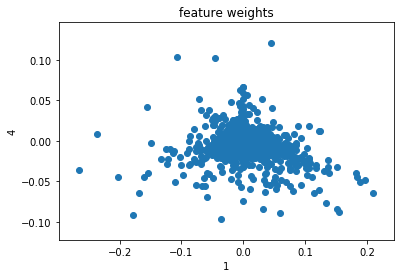

In [150]:
plt.scatter(lr.coef_[0],lr.coef_[3])
plt.xlabel(lr.classes_[0])
plt.ylabel(lr.classes_[3])
plt.title('feature weights');

### predictive accuracy for books

In [151]:
y_hat = lr.predict(X_test)
y_hat

array([2, 3, 1, 4, 4, 2, 2, 4, 2, 1, 2, 1, 3, 2, 3, 4, 3, 1, 2, 1])

In [152]:
# what percentage is classified correctly? 
acc = (y_hat == y_test).mean()
print('accuracy: %.3f'%acc)

accuracy: 0.700


In [153]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test,y_hat),
      f1_score(y_test,y_hat,average='macro'), #f1 score is geometric mean of recall & precision
      f1_score(y_test,y_hat,average='micro')) #Macro-averaging means average across labels.
#scores are different because the samples across labels is unbalanced.
#On an instance level, if I care about being right then I want to look at micro.
#Macro looks at the f1 for all my labels, and averages them all together. Do this when 
#you care about the rare cases, even if the label only appears a small 
#fraction of the time, we want to get it right. 

0.7 0.7010683760683761 0.7


In [154]:
yh=np.array(y_hat)
yt=np.array(y_test)
yh, yt

(array([2, 3, 1, 4, 4, 2, 2, 4, 2, 1, 2, 1, 3, 2, 3, 4, 3, 1, 2, 1]),
 array([1, 4, 2, 4, 4, 2, 2, 4, 2, 1, 2, 1, 3, 3, 3, 4, 2, 1, 3, 1]))

In [155]:
# metrics for each label: we probably want to err on the side of minimizing false negatives
yh=np.array(y_hat)
yt=np.array(y_test)

for label in lr.classes_:
    label_tp=sum((yt==label) & (yh==label))
    label_fp=sum((yt!=label) & (yh==label))
    label_fn=sum((yt==label) & (yh!=label))
    if label_tp+label_fp!=0:
        label_prec = label_tp/(label_tp+label_fp) 
    else:
        label_prec=0
    if sum(yt==label)!=0:
        label_rec = label_tp/sum(yt==label)
    else:
        label_rec=0
    if label_prec + label_rec !=0:
        f1=2 * label_prec * label_rec / (label_prec + label_rec)
    else:
        f1=0
    print(label,': ', 'TPos %s'%(label_tp), 'FPos %s'%(label_fp),'FNeg %s'%(label_fn), 'Prec %s'%(label_prec),'Recall %.1f'%(label_rec),'F1 %s'%(f1))       

1 :  TPos 4 FPos 1 FNeg 1 Prec 0.8 Recall 0.8 F1 0.8000000000000002
2 :  TPos 4 FPos 3 FNeg 2 Prec 0.5714285714285714 Recall 0.7 F1 0.6153846153846153
3 :  TPos 2 FPos 2 FNeg 2 Prec 0.5 Recall 0.5 F1 0.5
4 :  TPos 4 FPos 0 FNeg 1 Prec 1.0 Recall 0.8 F1 0.888888888888889


### predictions for YT

In [159]:
yt_hat = lr.predict(newdata)
yt_hat

array([2, 4, 4, 4, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 2, 4, 4, 1, 1, 1, 4, 4, 4, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2])

In [373]:
ytdata['predAge']=yt_hat

In [374]:
sortedyt = ytdata.sort_values(by='predAge', ascending=True)

In [167]:
sortedyt.to_csv("results.csv", index=False, encoding='utf8')

In [375]:
show = pd.DataFrame() 
show['Video'] = sortedyt['title']
show['Age_Group'] = sortedyt['predAge']
show

,Video,Age_Group
0,RALPH BREAKS THE INTERNET: Wreck-it Ralph 2 Tr...,1
48,WRECK-IT RALPH 2 'Disney Princesses ft. Frozen...,1
25,🐸 Disney in Color 🐸 #8 BEST EVER DISNEY DREAM ...,1
26,10 Iconic Treats You Shouldn't Skip At Disney ...,1
27,Disney's DUMBO Movie Trailer (2018),1
28,DISNEY - ORIGINAL SINGING VOICE ACTORS ..!! 20...,1
29,Walt Disney World & Florida Vlog - May 2018 - ...,1
30,10 Theories That Make Disney Movies So Much Da...,1
31,Adventureland - Magic Kingdom | Relaxing Strol...,1
23,DISNEY - ORIGINAL SINGING VOICE ACTORS..!! 2018,1


In [348]:
!pip install mysql-connector==2.1.4

    100% |████████████████████████████████| 358kB 7.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for mysql-connector ... done
  Stored in directory: /Users/shawnramirez/Library/Caches/pip/wheels/1a/db/29/c7d096eaa31cc71ac259b9183a91ddf62bfd293cf52cfdf3dc
Successfully built mysql-connector


In [22]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

In [23]:
#Define a database name. Set your postgres username.
dbname = 'bst'
username = 'shawnramirez'

In [24]:
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://shawnramirez@localhost/bst


In [25]:
## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [366]:
# push table to SQL (not useful for big data)
sortedyt.to_sql(name='ytresults', con=engine, if_exists = 'replace')